## Comparing models and data

We start by loading the necessary modules. A lot of data processing could be done with other python packages like csv and pandas, but here we only use numpy

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Now we load the different models. 
The models.csv file contains a table of multipoles (first column) and the Cl's for ten models (columns 2-11)


In [2]:
# The function genfromtxt is very useful for reading data from a file
models = np.genfromtxt("models.csv", dtype=float, delimiter=',', names=True)

We can investigate what the table we just imported looks like

In [3]:
# This will print the first row of the table 
print(models[0])
# This will print the list of multipoles and the first model
print(models["ell"], models["model_1"])
# Let's get the number of models (this will be useful for looping over models later on)
num_models = len(models[0])-1
print(num_models)

(2., 1.35181164e-10, 1.80315971e-10, 1.52660569e-10, 1.21368913e-10, 1.5981288e-10, 1.4015782e-10, 1.54878805e-10, 1.28950161e-10, 1.05367672e-10, 1.5269935e-10)
[2.000e+00 3.000e+00 4.000e+00 ... 2.498e+03 2.499e+03 2.500e+03] [1.35181164e-10 1.28528931e-10 1.22268699e-10 ... 1.12652973e-11
 1.12308578e-11 1.11965206e-11]
10


### **1. Load the Planck data in the same way, and print out the Dl column**

The data is located in a file called "planck_data.csv", and 
contains the following columns: `ell, Dl, minus_dDl, plus_dDl, BestFit`

In [4]:
planckTT_binned = np.genfromtxt("planck_data.csv", dtype=float, delimiter=',', names=True)
# Print out one of the columns to check things look right
print(planckTT_binned["Dl"])

[1480.  2030.  2960.  3870.  4890.  5460.  5790.  5370.  4630.  3600.
 2630.  2030.  1750.  1790.  2160.  2420.  2570.  2550.  2360.  2100.
 1880.  1810.  1880.  2100.  2320.  2460.  2520.  2390.  2080.  1740.
 1420.  1170.  1060.  1050.  1130.  1210.  1230.  1210.  1120.   968.
  864.   762.   732.   737.   775.   807.   809.   778.   729.   648.
  551.   477.   420.   395.   392.   393.   398.   383.   375.   340.
  308.   274.   250.   244.   232.   235.   232.   220.   214.   197.
  176.   152.   139.   121.   116.   118.   116.   110.   120.    90.5
  103.    73.7   61.3]


We can plot the models and data to see what they look like

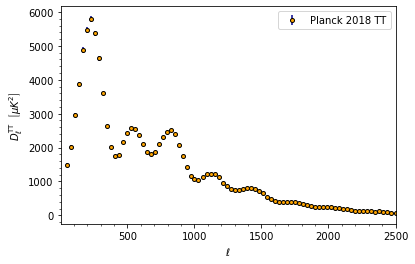

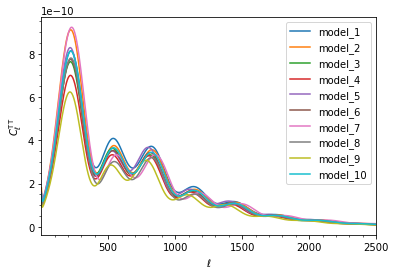

In [5]:
# We set up the figure, with linear axes and covering the full multipole range
plt.figure(1)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,2500)
plt.minorticks_on()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell^\mathrm{TT} \,\,\,\, \left[\mu K^2\right]$')

plt.errorbar(planckTT_binned["ell"], planckTT_binned["Dl"], yerr=[planckTT_binned["minus_dDl"],planckTT_binned["plus_dDl"]], label='Planck 2018 TT', fmt='o', markersize=4, ecolor='darkblue', markerfacecolor='orange', markeredgecolor='black')
plt.legend()

plt.figure(2)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,2500)
plt.minorticks_on()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^\mathrm{TT}$')
for i in range(num_models):
    model_name = "model_{}".format(i+1)
    plt.plot(models["ell"],models[model_name], label=model_name)
plt.legend()

We can see that the models have different units than the data. The Planck data contains the Dls, in units of microkelvin squared, while the models are dimensionless. To fix this, we need to convert the Cls for the models to Dls:
`Dls = Cls * T_cmb**2`
with T_cmb = $2.7255\times 10^6 \mu$K

### **2. Make a plot with the data and the models together, in the correct units**

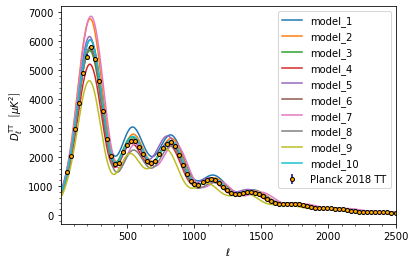

In [6]:
T_cmb = 2.7255e6

plt.figure(1)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,2500)
plt.minorticks_on()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell^\mathrm{TT} \,\,\,\, \left[\mu K^2\right]$')

for i in range(num_models):
    model_name = "model_{}".format(i+1)
    plt.plot(models["ell"],models[model_name]*T_cmb**2, label=model_name)

plt.errorbar(planckTT_binned["ell"], planckTT_binned["Dl"], yerr=[planckTT_binned["minus_dDl"],planckTT_binned["plus_dDl"]], label='Planck 2018 TT', fmt='o', markersize=4, ecolor='darkblue', markerfacecolor='orange', markeredgecolor='black')

plt.legend()

Now we move on to the data analysis. First, we should check if the data series and models have the same length, and are sampled at the same multipoles

### **3. Use the `len()` function to get the length of the data and models, and print the list of multipoles (ell) for the models and data**

In [7]:
print(len(models["ell"]), models["ell"])
print(len(planckTT_binned["ell"]),planckTT_binned["ell"])

2499 [2.000e+00 3.000e+00 4.000e+00 ... 2.498e+03 2.499e+03 2.500e+03]
83 [  47.7   76.5  106.   136.   165.   195.   225.   255.   285.   315.
  345.   375.   405.   435.   465.   495.   525.   555.   585.   615.
  645.   675.   705.   735.   765.   795.   825.   855.   885.   915.
  945.   975.  1000.  1030.  1060.  1090.  1120.  1150.  1180.  1210.
 1240.  1270.  1300.  1330.  1360.  1390.  1420.  1450.  1480.  1510.
 1540.  1570.  1600.  1630.  1660.  1690.  1720.  1750.  1780.  1810.
 1840.  1870.  1900.  1930.  1960.  1990.  2020.  2050.  2080.  2110.
 2140.  2170.  2200.  2230.  2260.  2290.  2320.  2350.  2380.  2410.
 2440.  2470.  2500. ]


We can see that the data series has fewer points than the models, and some of the multipole numbers don't match. We can interpolate in the model Cls and resample the models at the correct multipoles. We will make use of the numpy function `interp()`, with the syntax `np.interp(new_ell_range, old_ell_range, model_cls)`.

### **4. Complete the following function to resample the model Cls**

In [8]:
# We will do the interpolation in a loop over all models. 
# This sets up an array we can add to in a loop
model_interpolated = {}

# Now we loop over all models
for i in range(num_models):
    model_name = "model_{}".format(i+1)
    # Complete the following line! 
    model_interpolated[i] = np.interp(planckTT_binned["ell"], models["ell"], models[model_name])

### **5. Make a new plot with the resampled models (in the correct units) and the data points**

Note that now we want to see the actual model points, not a line.
To do this, we will need to change the syntax from 
`plt.plot(ell_range, Dls, label=model_name)` to
`plt.scatter(ell_range, Dls, label = model_name, marker='x')`. The Cls of model $i$ are now located in `model_interpolated[i]`.

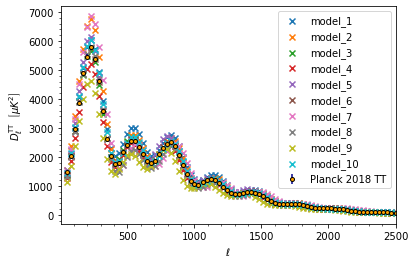

In [9]:
plt.figure(1)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,2500)
plt.minorticks_on()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell^\mathrm{TT} \,\,\,\, \left[\mu K^2\right]$')

plt.errorbar(planckTT_binned["ell"], planckTT_binned["Dl"], yerr=[planckTT_binned["minus_dDl"],planckTT_binned["plus_dDl"]], label='Planck 2018 TT', fmt='o', markersize=4, ecolor='darkblue', markerfacecolor='orange', markeredgecolor='black')
for i in range(num_models):
    model_name = "model_{}".format(i+1)
    plt.scatter(planckTT_binned["ell"], model_interpolated[i]*T_cmb**2, label=model_name, marker='x')
plt.legend()

Now we want to find which model is a better description of the data. We will use Pearson's chi2 test:

$ \sum_l \frac{(data_l - model_l)^2}{model_l}$

which is summed over every data point $l$. The model with the lowest chi2 provides the best fit to the data.
Here we could write a loop to sum over each value, but we can also make use of the numpy `sum()` function.

### **6. Complete the following function to calculate the chi2 of each model**

In [10]:
chi2_models = []

# loop over models
for i in range(num_models):
    # Complete the following line!
    chi2_models.append(np.sum((planckTT_binned["Dl"]-model_interpolated[i]*T_cmb**2)**2/(model_interpolated[i]*T_cmb**2)))    
    print("model {} has a chi2 of {:.2f}".format(i+1, chi2_models[i]))


model 1 has a chi2 of 1275.83
model 2 has a chi2 of 1557.74
model 3 has a chi2 of 154.59
model 4 has a chi2 of 719.95
model 5 has a chi2 of 433.45
model 6 has a chi2 of 32.34
model 7 has a chi2 of 2909.21
model 8 has a chi2 of 814.44
model 9 has a chi2 of 5139.42
model 10 has a chi2 of 287.18


### **7. Use the `min()` and `index()` functions to find the model with the minimum chi2**

The syntax will be `min(array_name)` and `array_name.index(min(array_name))`. Remember that our models are numbered from 1 to 10, but python starts indeces from 0.

In [11]:
min_chi2 = min(chi2_models)
model_with_min_chi2 = chi2_models.index(min(chi2_models))+1
print("The lowest chi2 is {:.2f}, in model {} ".format(min_chi2, model_with_min_chi2))

The lowest chi2 is 32.34, in model 6 


### **8. Look up the model parameters for the best model in the `parameters.csv` file**

You can use the same functions we used to load the model and the data above. The file `parameters.csv` contains the following columns: `param_name, model_1, ..., model_10`

In [12]:
params = np.genfromtxt("parameters.csv", dtype=None, delimiter=',', names=True, encoding=None)

# Quickest way of doing it
# print(params["param_name"],params["model_6"])

# Nicer way of doing it, getting everything automatically instead of hard-coding the best model
best_model_name = "model_" + str(model_with_min_chi2)
print("Model {} has parameters:".format(model_with_min_chi2))
for i in range(len(params["param_name"])):
    print("{} = {}".format(params["param_name"][i],params[best_model_name][i]))

Model 6 has parameters:
h = 0.67
omega_b = 0.022
omega_cdm = 0.12
(10^9)A_s = 2.1
n_s = 0.96
z_reio = 7.5


### **9. Compare the parameters of your model to the bestfit found by Planck, and see if the results match**

The Planck results are listed in the instructions sheet. The model parameters you found should be close to the Planck ones. If so, you have successfully reproduced the results of one of the leading CMB missions!